# EDA

- 해당 데이터의 경우 feature의 갯수가 500개 이상으로 매우 많다.
- 따라서 feature의 중요도를 고려하여 선별적으로 feature를 뽑아 진행하는 것이 좋을 것 같다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### 데이터 불러오기

In [4]:
data = pd.read_csv("../data/data01_train.csv")
features = pd.read_csv("../data/features.csv")

In [5]:
data.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING


In [6]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594,17.381568
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479,8.938316
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555,8.000000
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951,19.000000
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000,30.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 25.3+ MB


### data의 목표 변수 확인하기

- target = 'Activity'
- 범주의 종류, 범주별 빈도수 및 비율 확인

In [8]:
target = 'Activity'

data[target].info()
data[target].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 5881 entries, 0 to 5880
Series name: Activity
Non-Null Count  Dtype 
--------------  ----- 
5881 non-null   object
dtypes: object(1)
memory usage: 46.1+ KB


LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64

<Axes: xlabel='count', ylabel='Activity'>

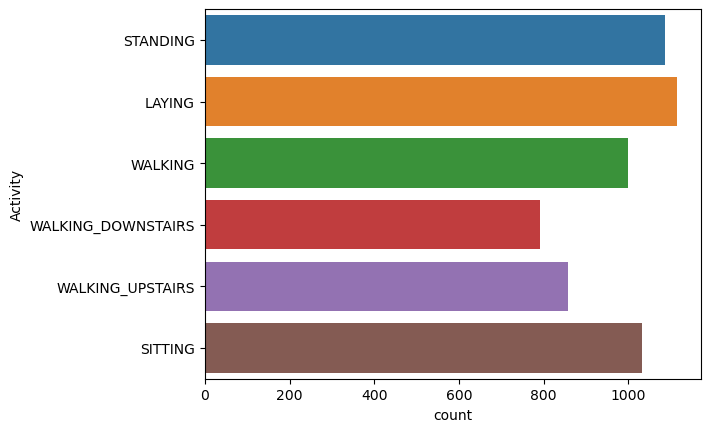

In [9]:
sns.countplot(y=target, data=data)

### 센서 그룹 데이터 features 갯수 확인하기

In [10]:
features.groupby('sensor').count()

,agg,axis,feature_name
sensor,,,
angle,7,7,7
fBodyAcc,79,78,79
fBodyAccJerk,79,78,79
fBodyAccMag,13,0,13
fBodyBodyAccJerkMag,13,0,13
fBodyBodyGyroJerkMag,13,0,13
fBodyBodyGyroMag,13,0,13
fBodyGyro,79,78,79
tBodyAcc,40,39,40


In [11]:
features.groupby('agg').count()

,sensor,axis,feature_name
agg,,,
X,1,1,1
Y,1,1,1
Z,1,1,1
arCoeff(),60,60,60
arCoeff()1,5,0,5
arCoeff()2,5,0,5
arCoeff()3,5,0,5
arCoeff()4,5,0,5
bandsEnergy(),126,126,126


In [12]:
features.groupby('axis').count()

,sensor,agg,feature_name
axis,,,
"1,16",5,5,5
"1,16.1",2,2,2
"1,16.2",2,2,2
"1,24",5,5,5
"1,24.1",2,2,2
...,...,...,...
"Z,2",5,5,5
"Z,3",5,5,5
"Z,4",5,5,5


### 데이터 분석하기
- data를 보면 column이 굉장히 많다. 그렇기에 변수 중요도를 체크하여 선별하고자 한다.

1. 기본 모델 생성하여 변수 중요도 확인하기
2. 중요한 feature와 중요하지 않은 feature 선정 및 분석하기

##### 1. 변수 중요도 확인하기

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

target = 'Activity'

X = data.drop(target, axis=1)
y = data.loc[:,target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

rand_model = RandomForestClassifier()
rand_model.fit(x_train, y_train)

RandomForestClassifier()

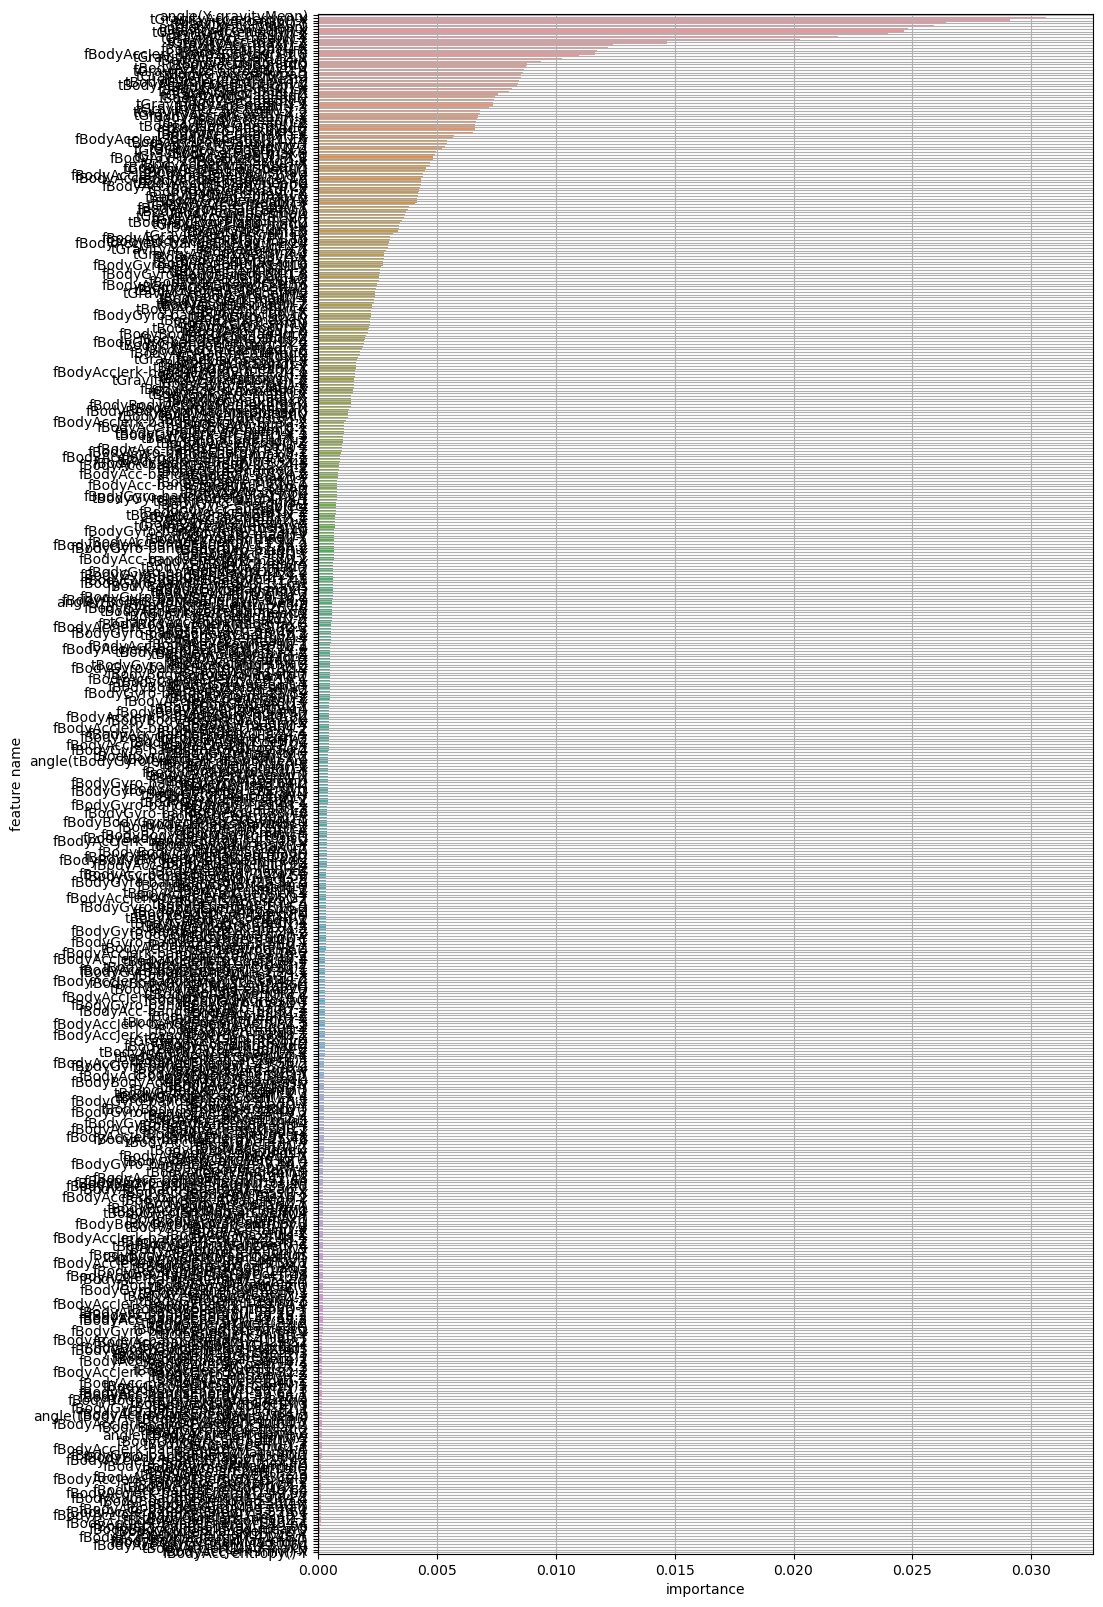

In [15]:
feature_names = rand_model.feature_names_in_
feature_importances = rand_model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 'all')

In [16]:
df.describe()

,feature_importance
count,562.000000
mean,0.001779
std,0.003949
min,0.000046
25%,0.000220
50%,0.000404
75%,0.001387
max,0.031052


,feature_name,feature_importance
0,"angle(Y,gravityMean)",0.031052
1,tGravityAcc-energy()-X,0.030610
2,tGravityAcc-min()-Y,0.029117
3,tGravityAcc-max()-Y,0.026432
4,"angle(X,gravityMean)",0.025910
...,...,...
107,tBodyAccJerk-entropy()-Y,0.002279
108,fBodyAcc-iqr()-X,0.002232
109,"fBodyGyro-bandsEnergy()-9,16",0.002226
110,fBodyGyro-sma(),0.002222


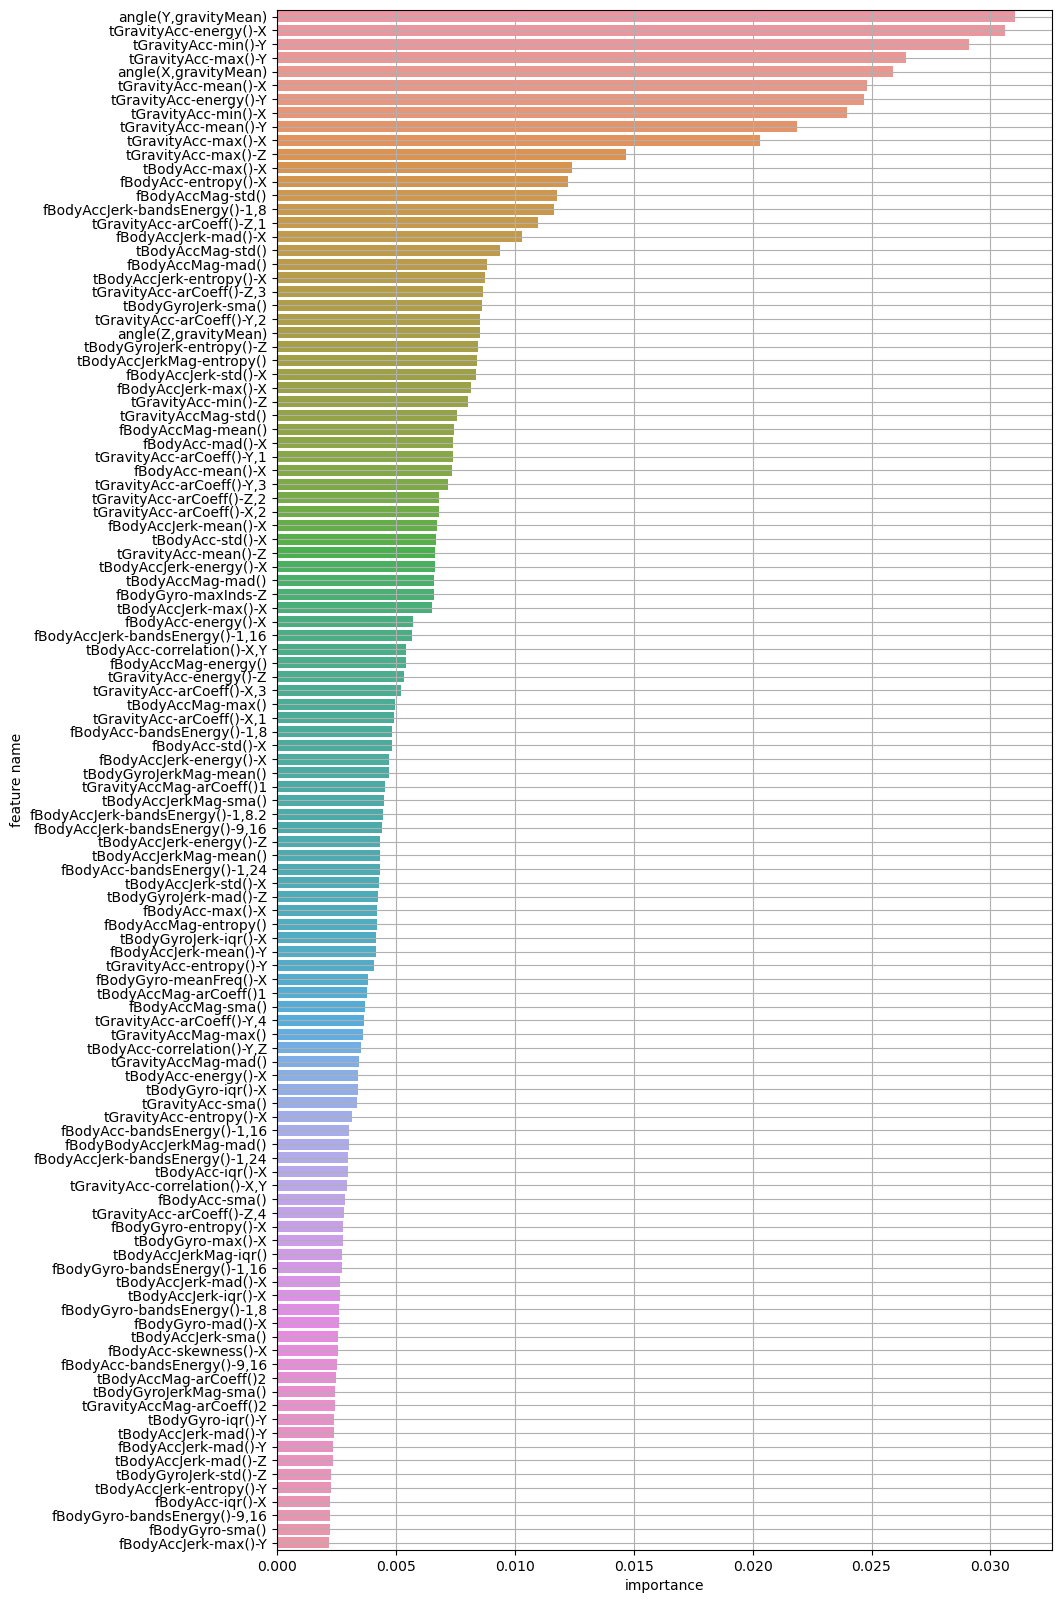

In [17]:
top_n = len(rand_model.feature_names_in_)

plot_feature_importance(feature_importances, feature_names, topn = int(top_n*0.2)) # 상위 20% 변수 목록 보여주기

##### 2.중요도 기반 feature 분석하기

<Axes: xlabel='angle(X,gravityMean)', ylabel='Density'>

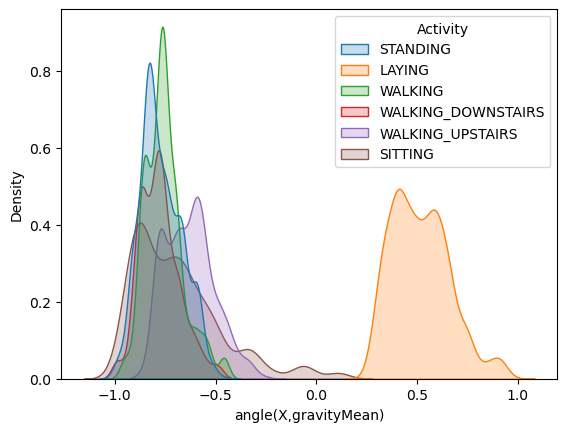

In [18]:
top_n = int(len(rand_model.feature_names_in_) * 0.2)
donw_m = int(len(rand_model.feature_names_in_) * 0.8)

high_rank = df[:top_n]['feature_name']
row_rank = df[donw_m:]['feature_name']

sns.kdeplot(x='angle(X,gravityMean)', hue=target, data=data, fill=True)

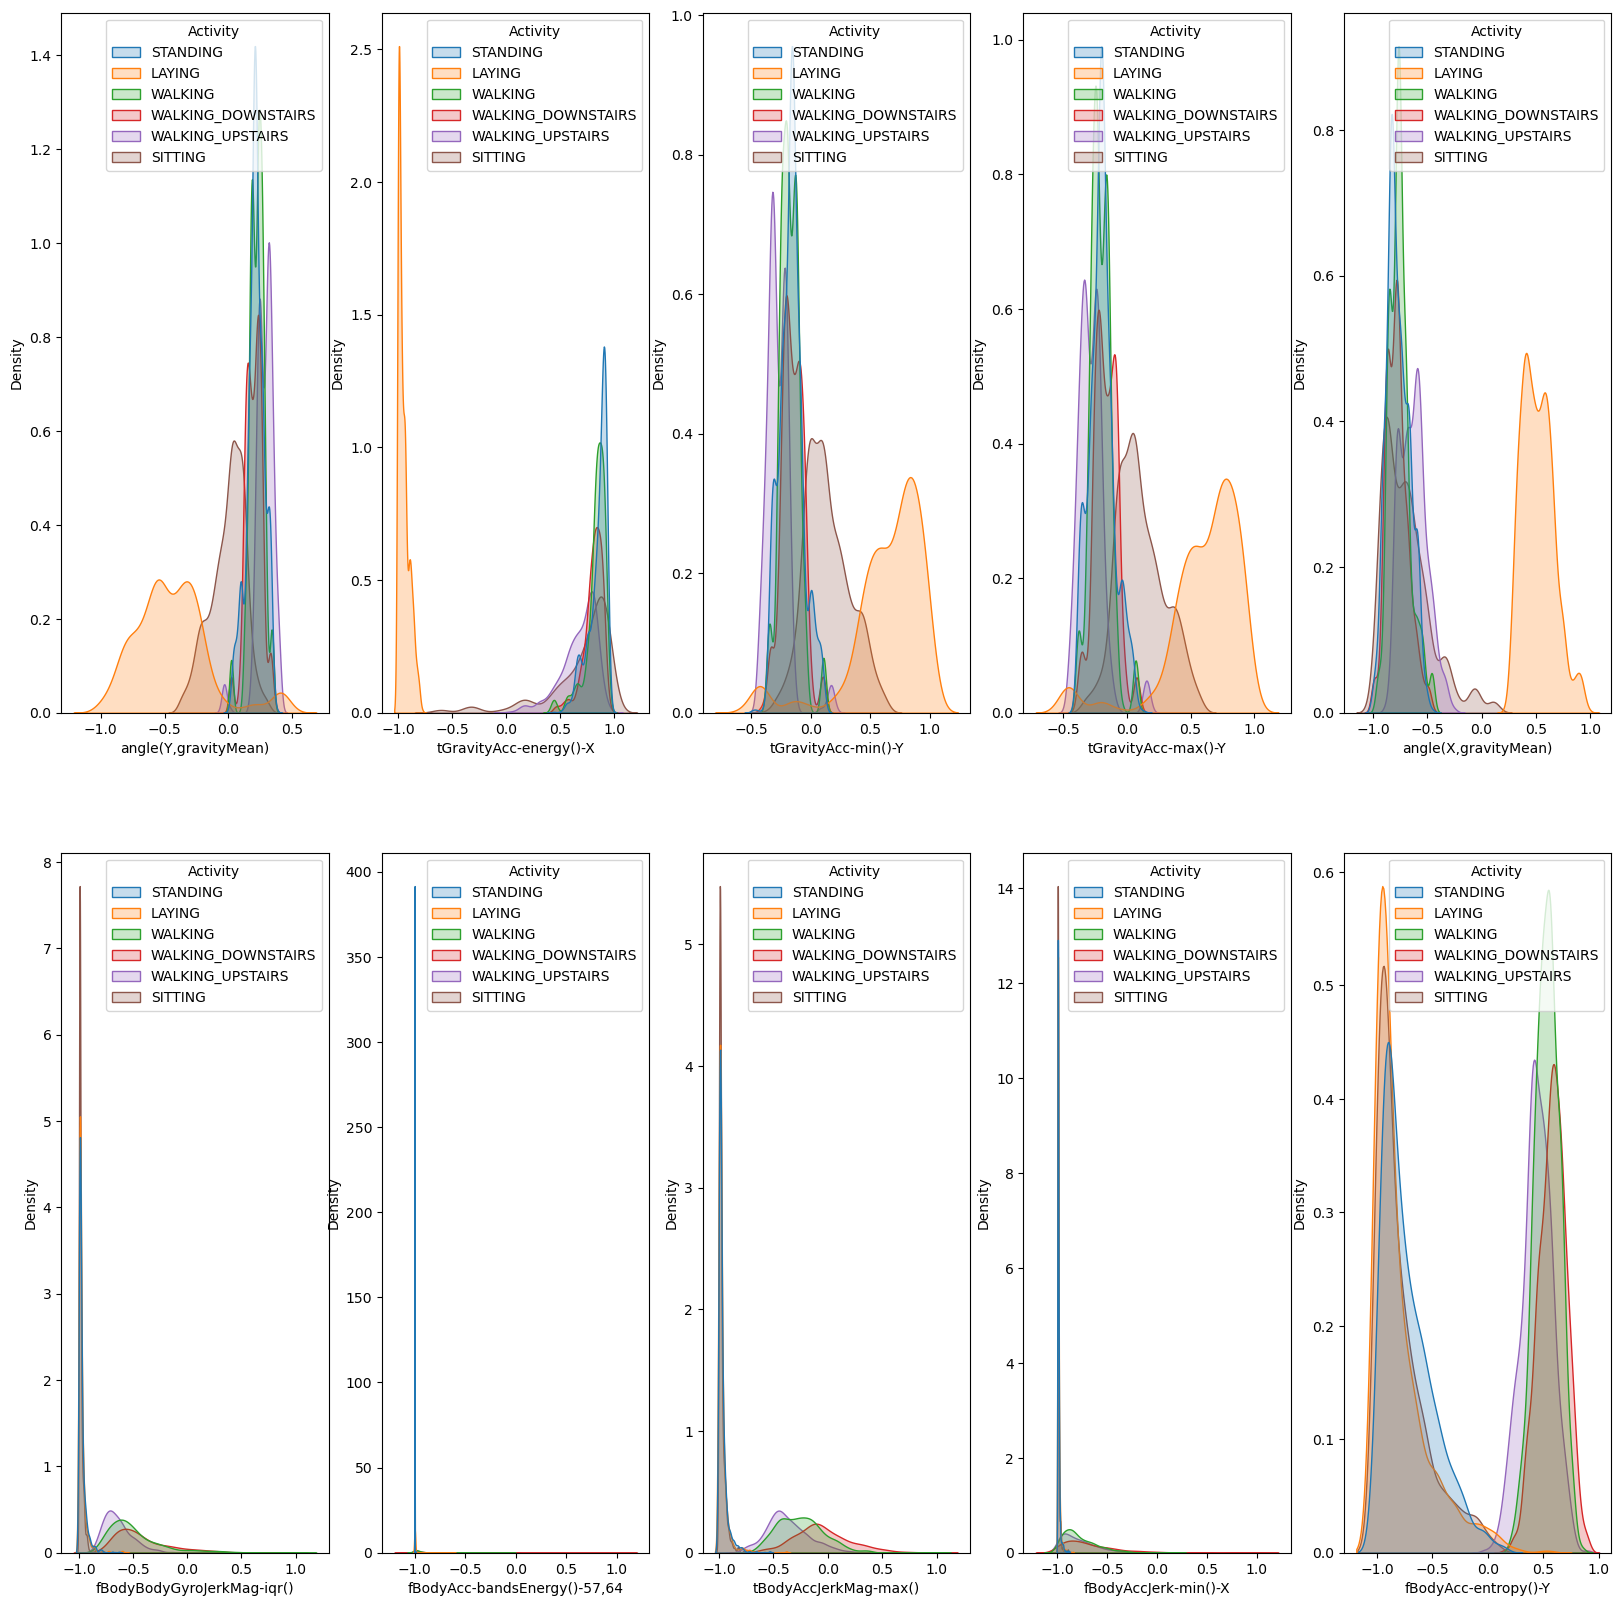

In [19]:
# 상위 5개 하위 5개 보기
high_rank = df[:5]['feature_name']
row_rank = df[-5:]['feature_name']

fig, ax = plt.subplots(ncols=5, nrows=2,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=high_rank.iloc[i], hue=target, data=data, fill=True, ax=ax[0,i])
    sns.kdeplot(x=row_rank.iloc[i], hue=target, data=data, fill=True, ax=ax[1,i])

### 개별 동작 분석 해보기
- Activity에서 각 unique한 값에 대하여 위에서 한 분석과 같은 방법의 분석을 해보자
- 각 unique한 값을 1 나머지 값을 0으로 처리하여 진행해보자(One-hot-Encoding)

##### standing

In [22]:
target = 'Activity'
data['is_standing'] = np.where(data[target]=='STANDING', 1, 0)

target = 'Activity'
new_target = 'is_standing'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

standing_model = RandomForestClassifier()

standing_model.fit(x_train, y_train)

RandomForestClassifier()

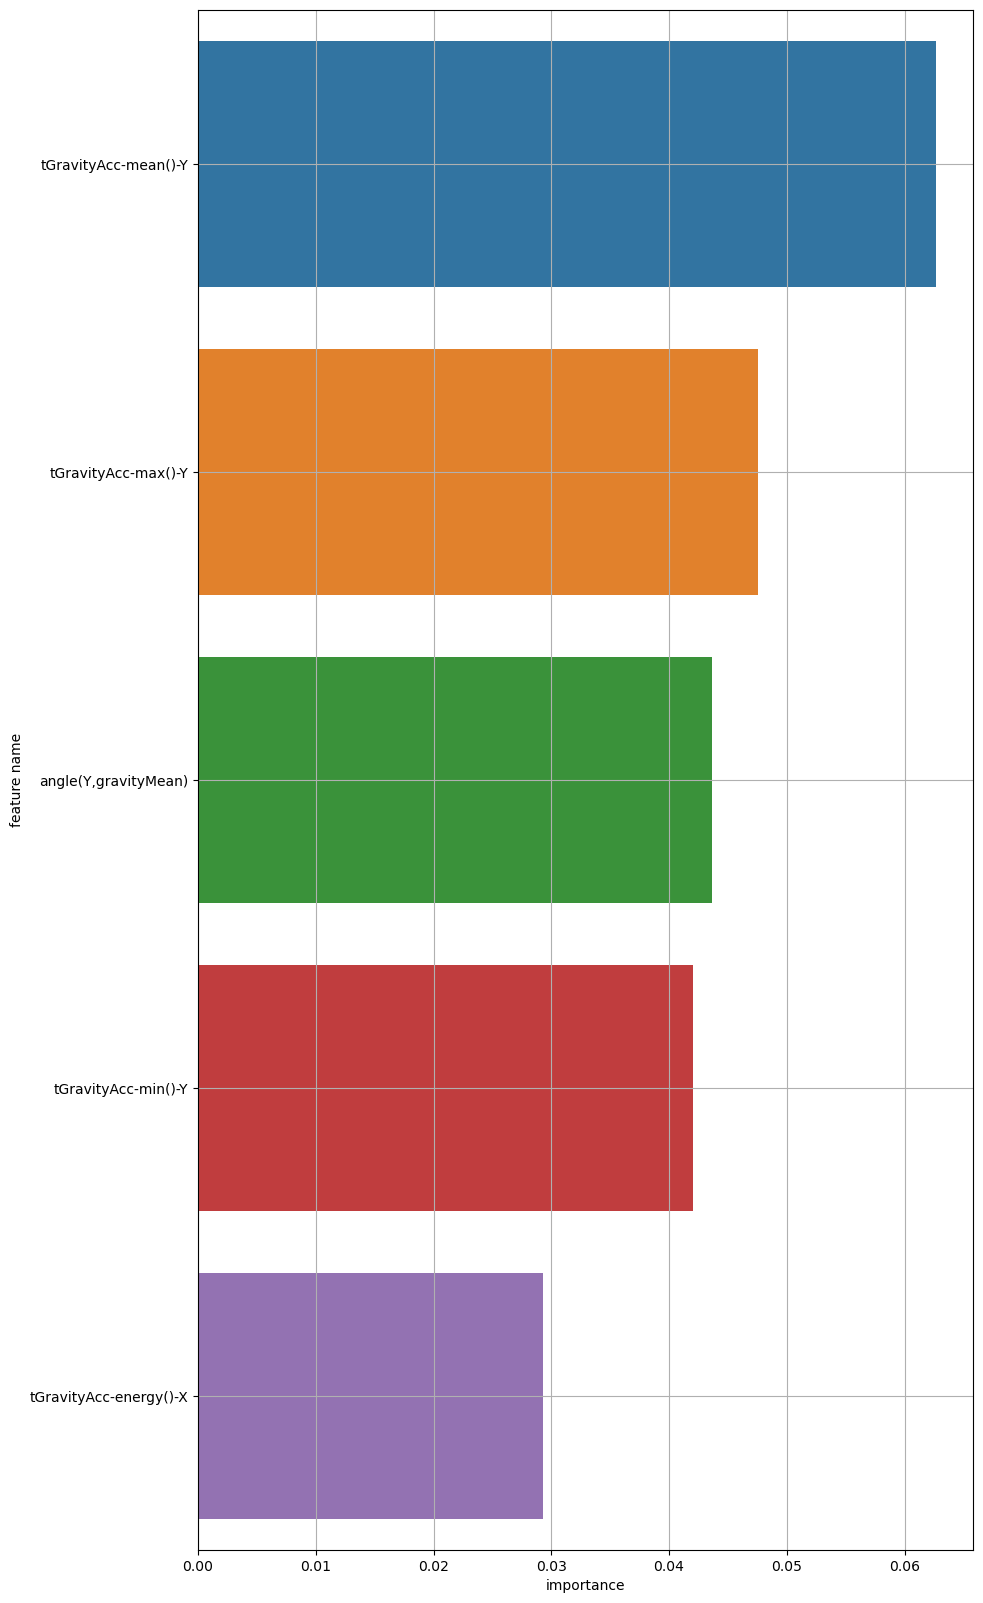

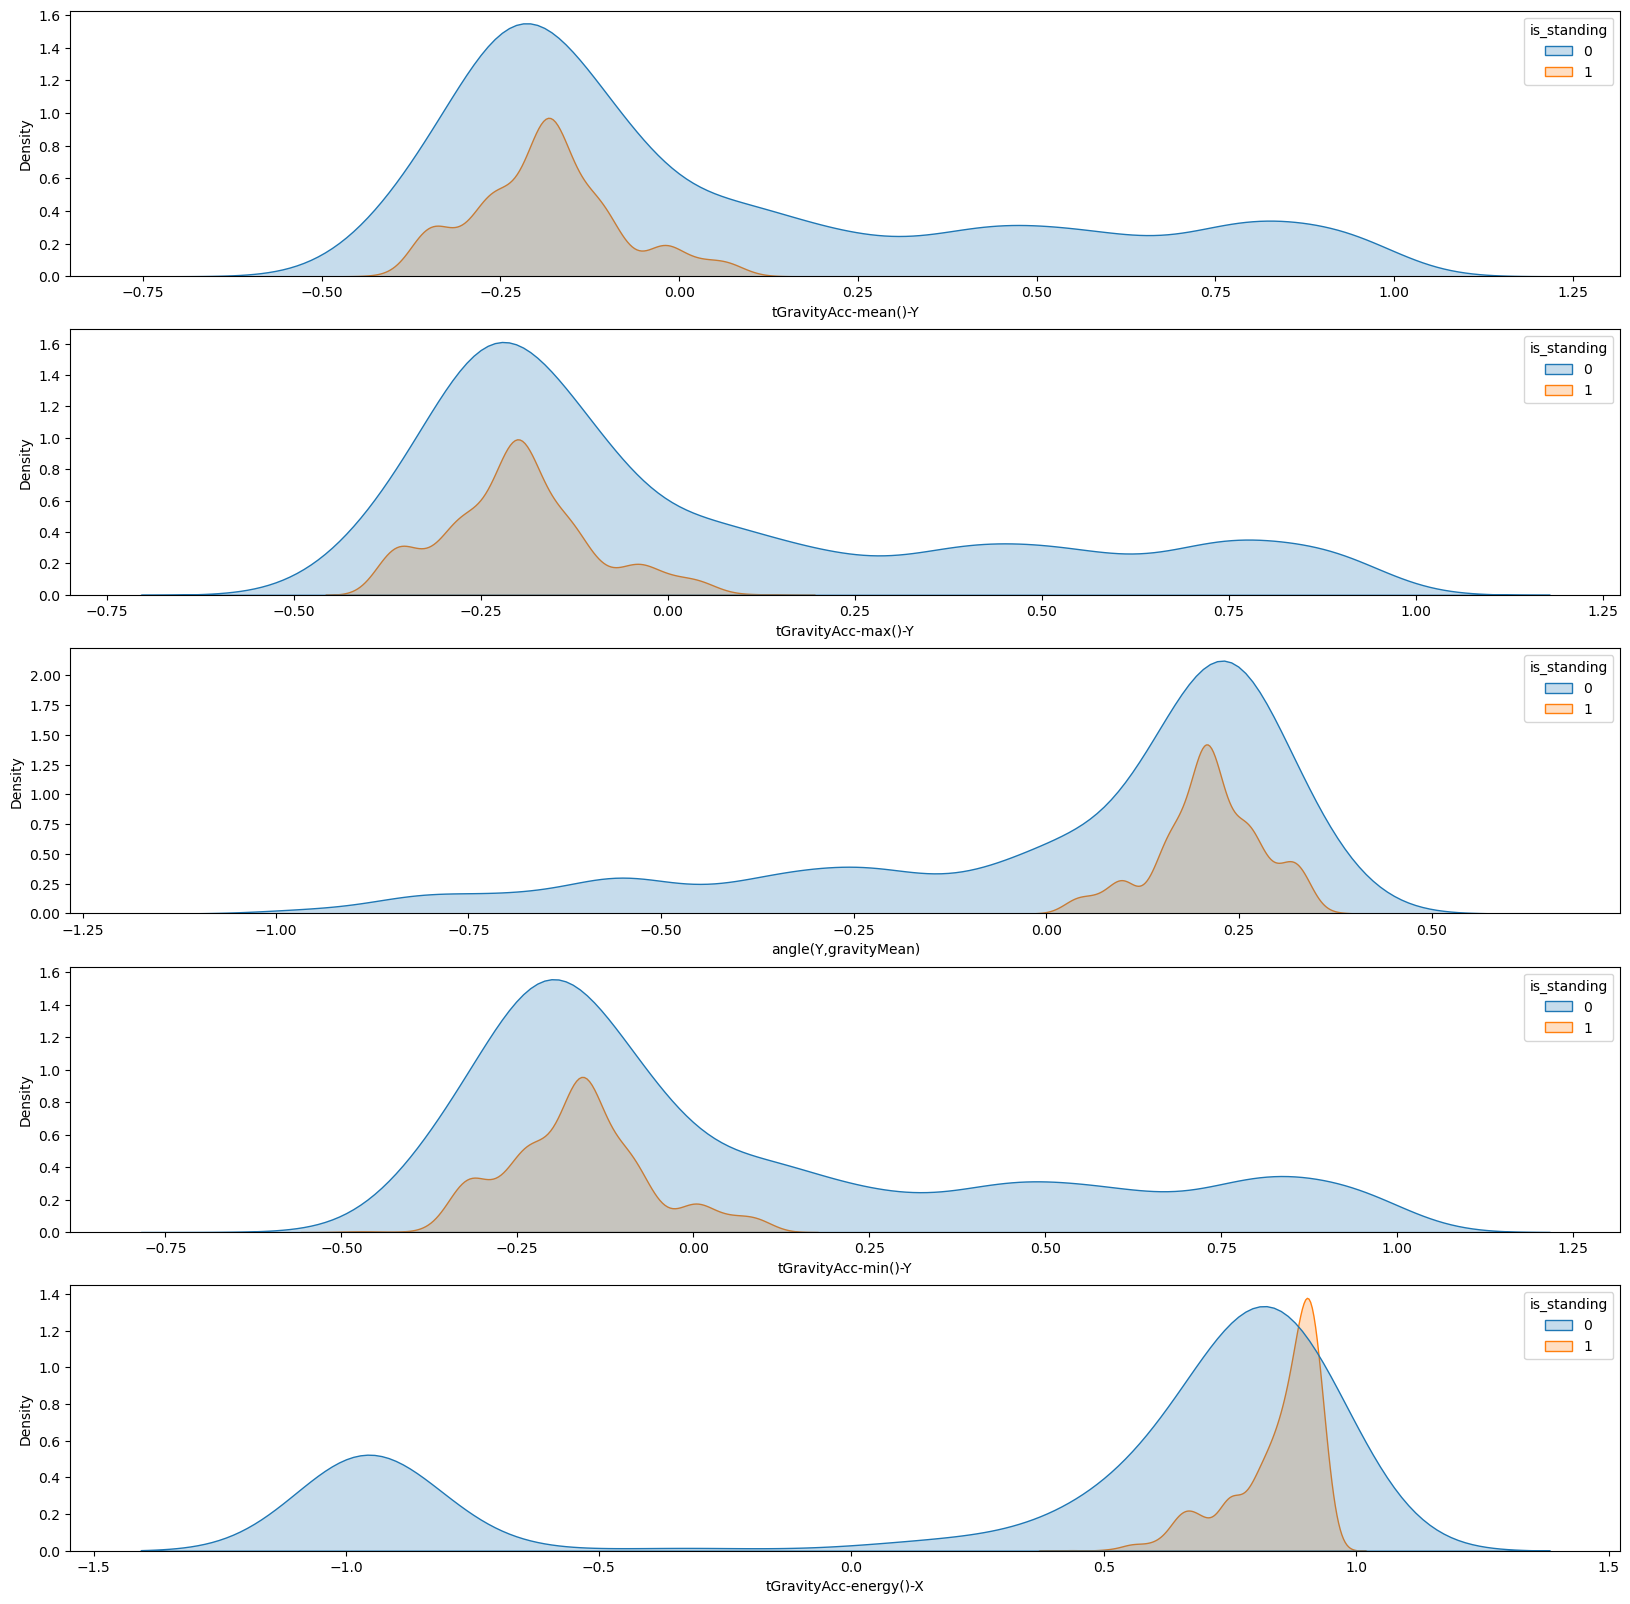

In [23]:
feature_names = standing_model.feature_names_in_
feature_importances = standing_model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)
# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])

##### sitting

In [24]:
target = 'Activity'

data['is_sitting'] = np.where(data[target]=='SITTING', 1, 0)

target = 'Activity'
new_target = 'is_sitting'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

sitting_model = RandomForestClassifier()
sitting_model.fit(x_train, y_train)

RandomForestClassifier()

C:\Users\user\AppData\Local\Temp\ipykernel_21988\866290224.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])


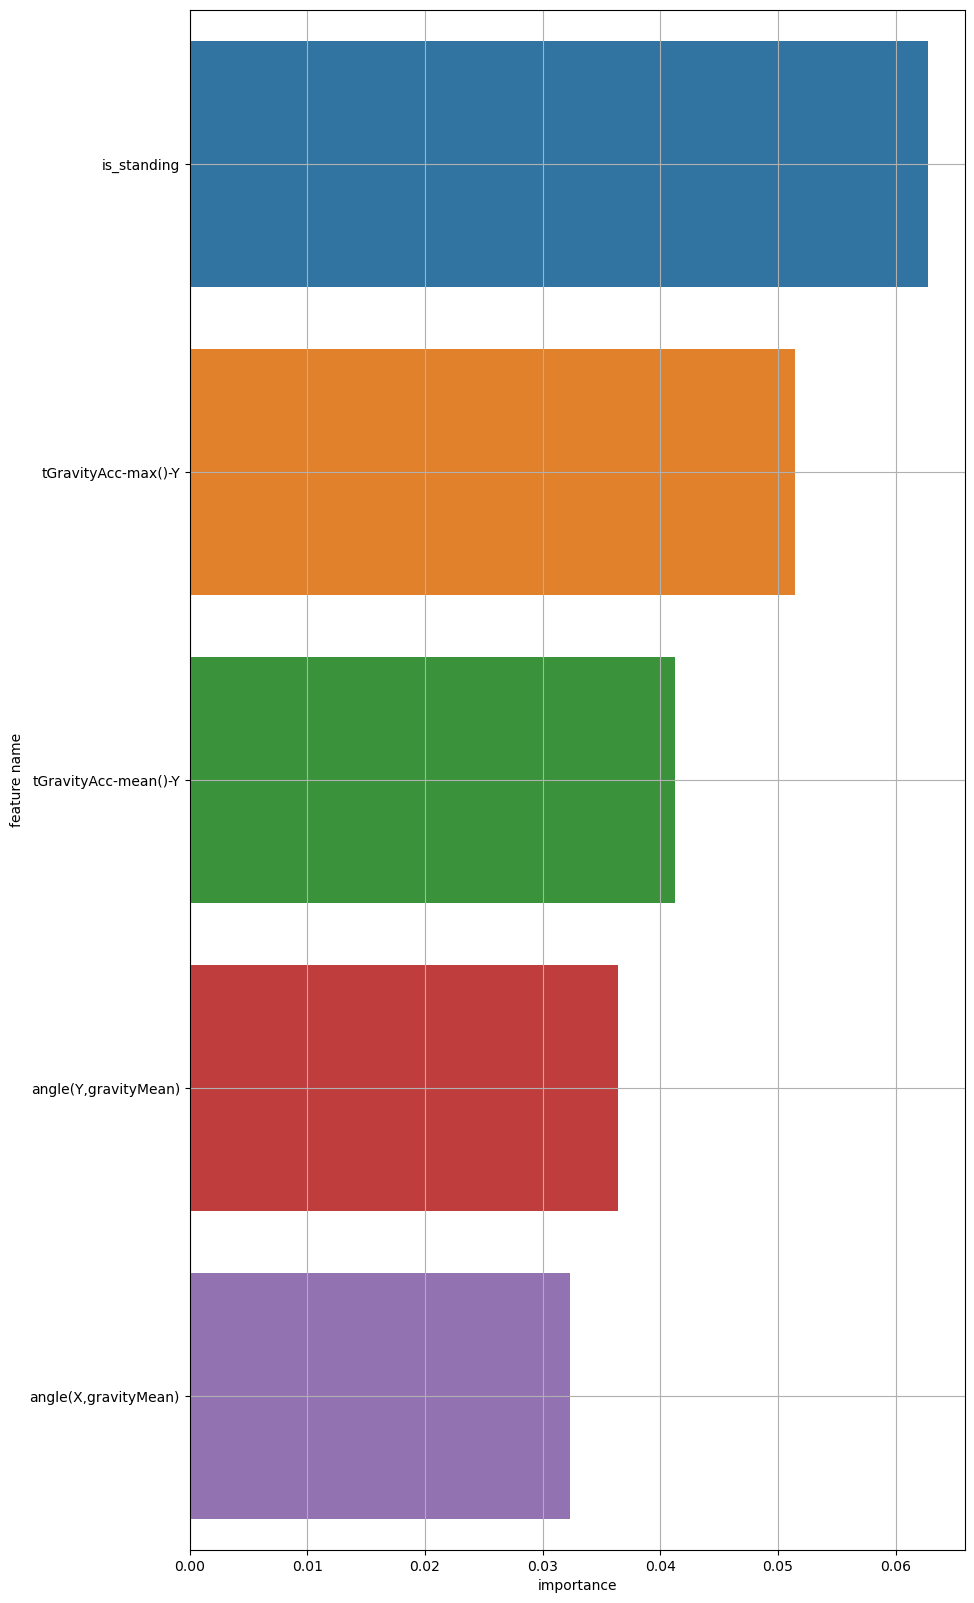

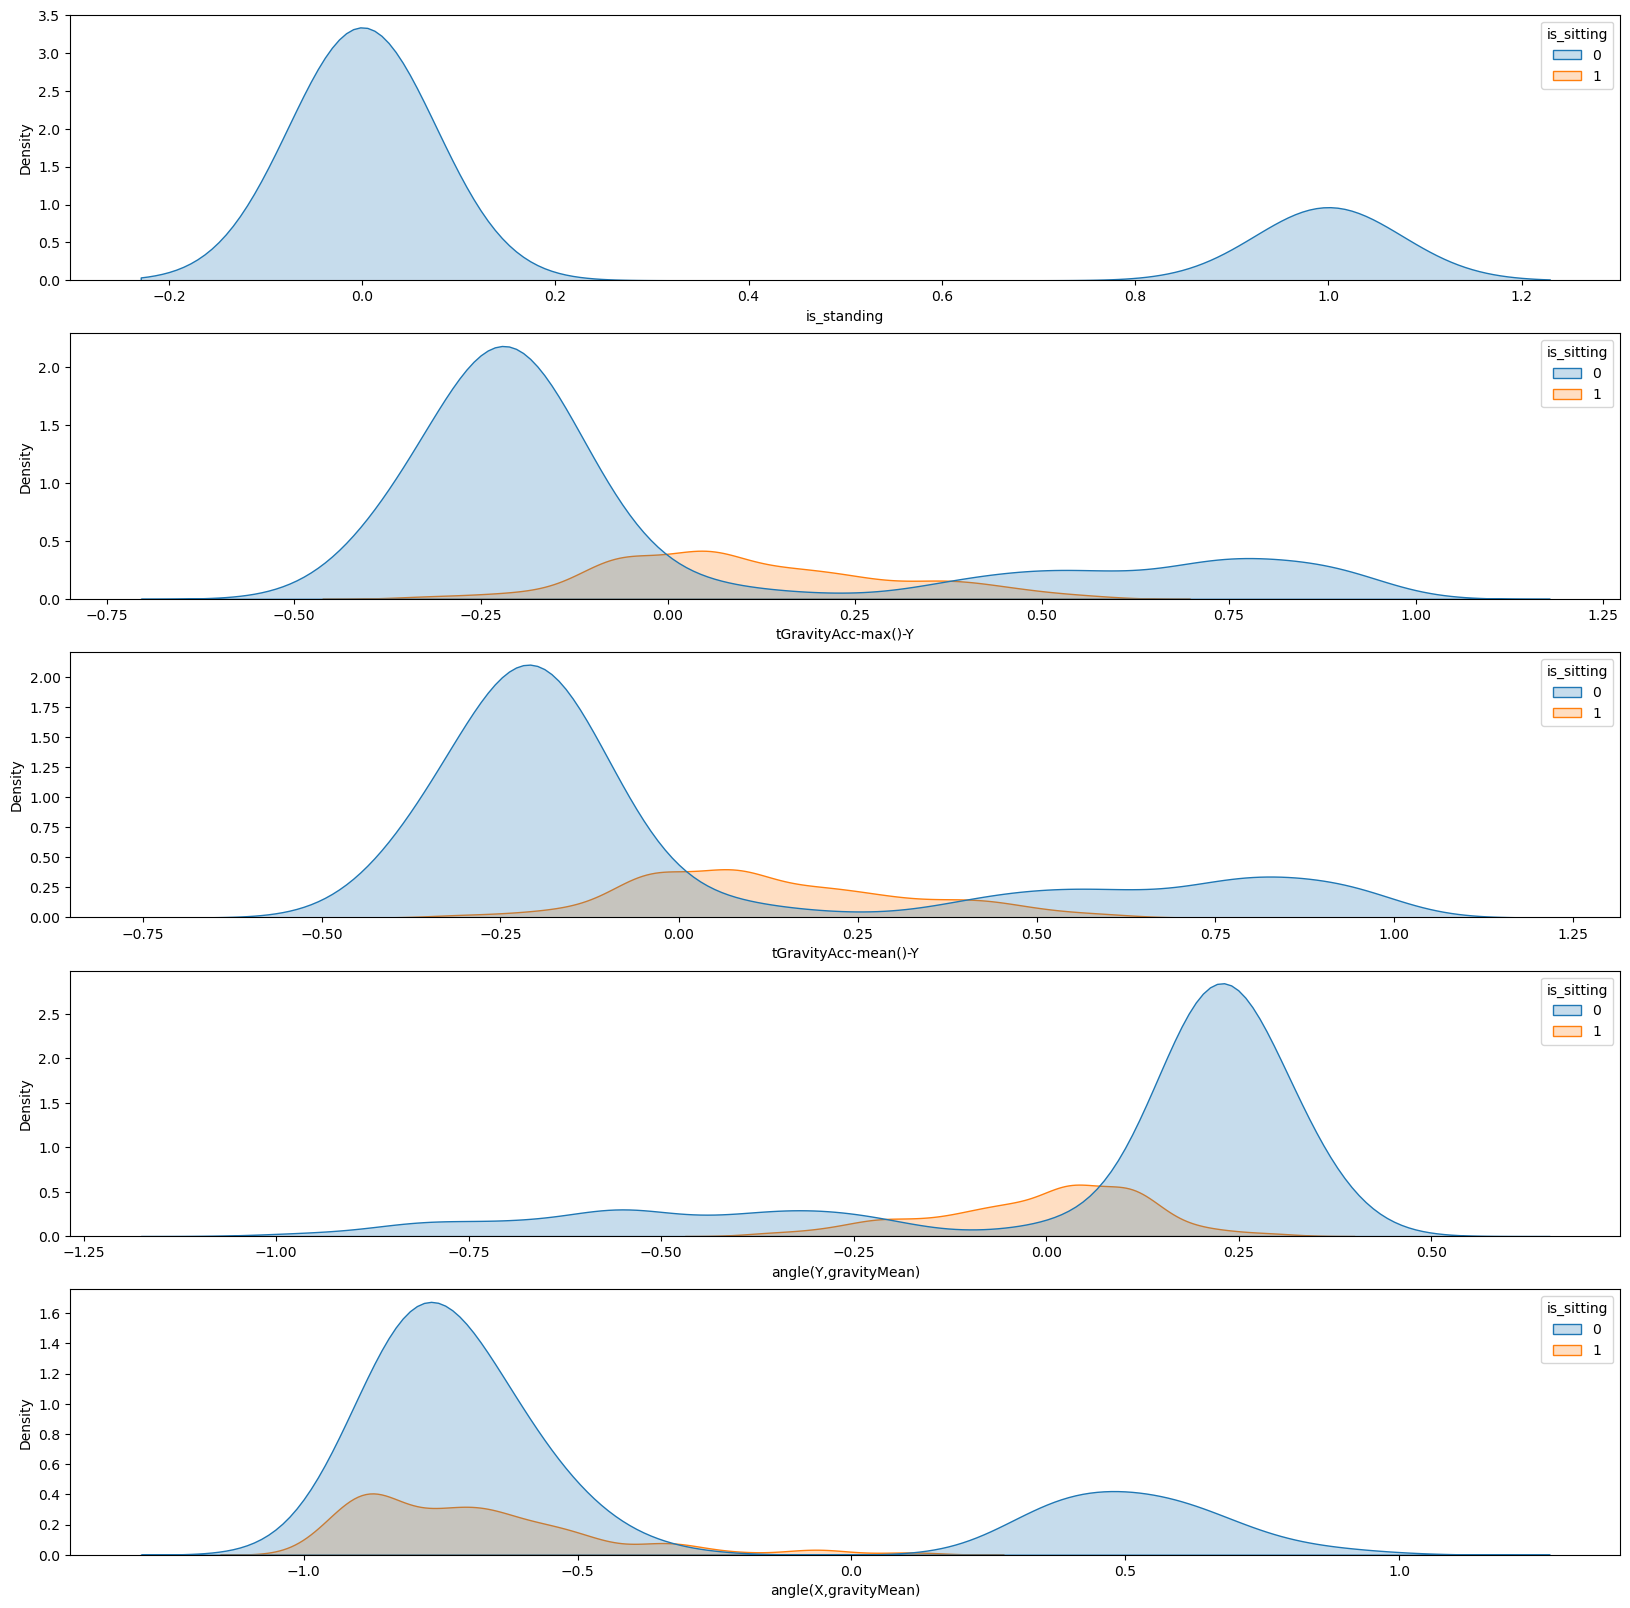

In [25]:
feature_names = sitting_model.feature_names_in_
feature_importances = sitting_model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)

# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])

##### laying

In [26]:
target = 'Activity'
data['is_laying'] = np.where(data[target]=='LAYING', 1, 0)

target = 'Activity'
new_target = 'is_laying'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

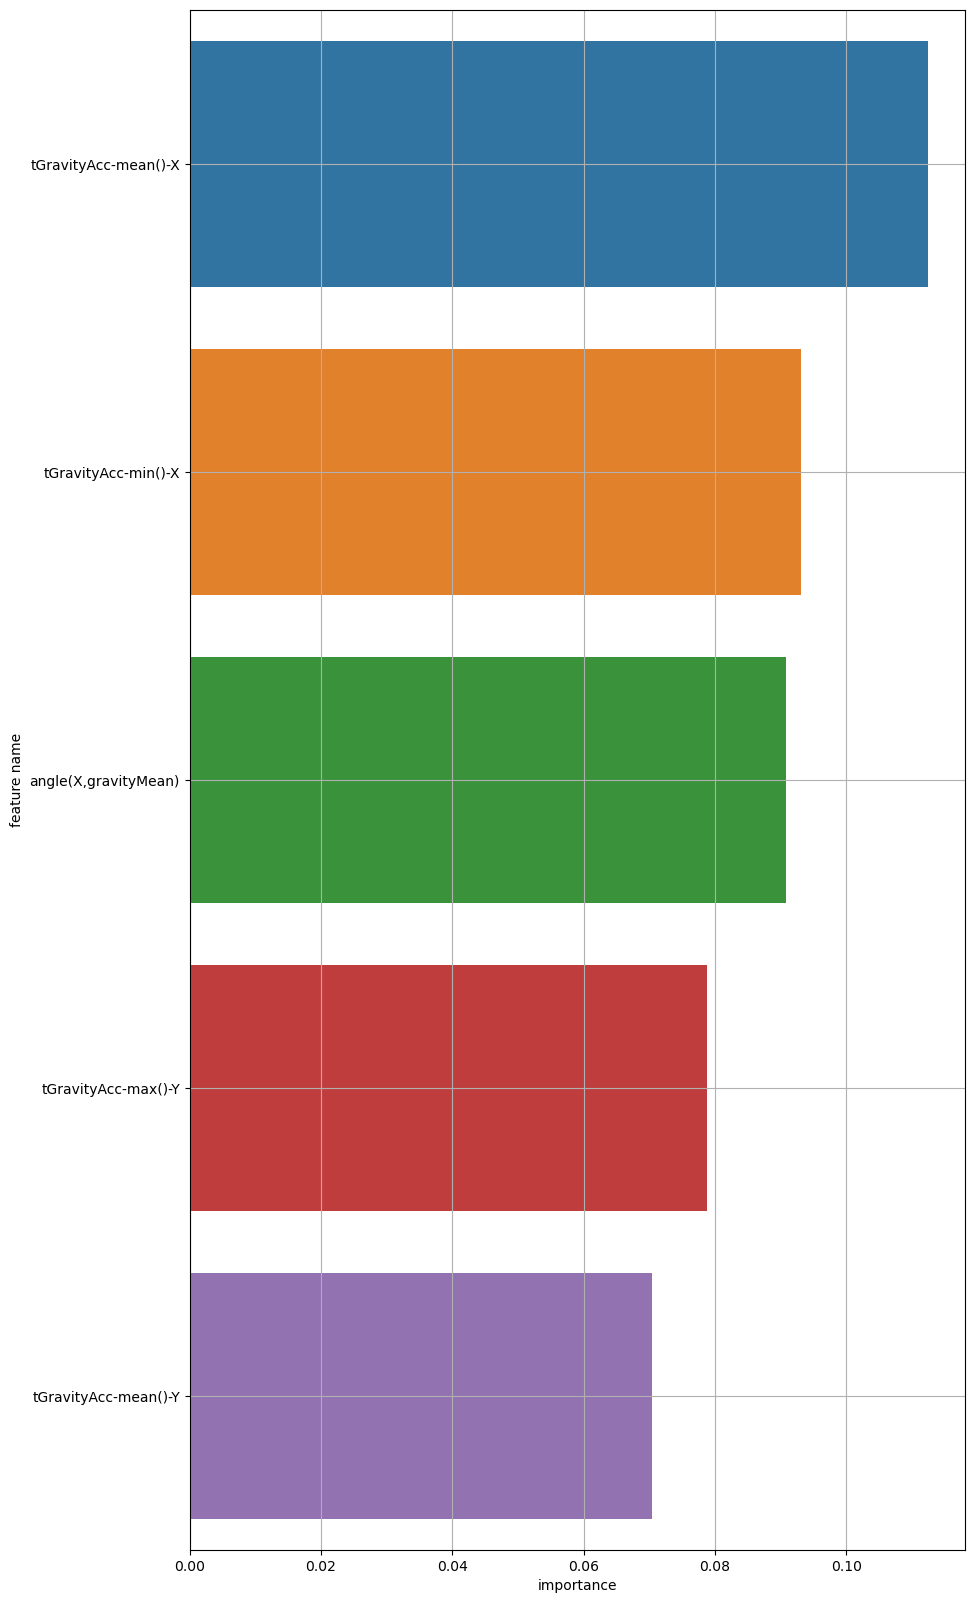

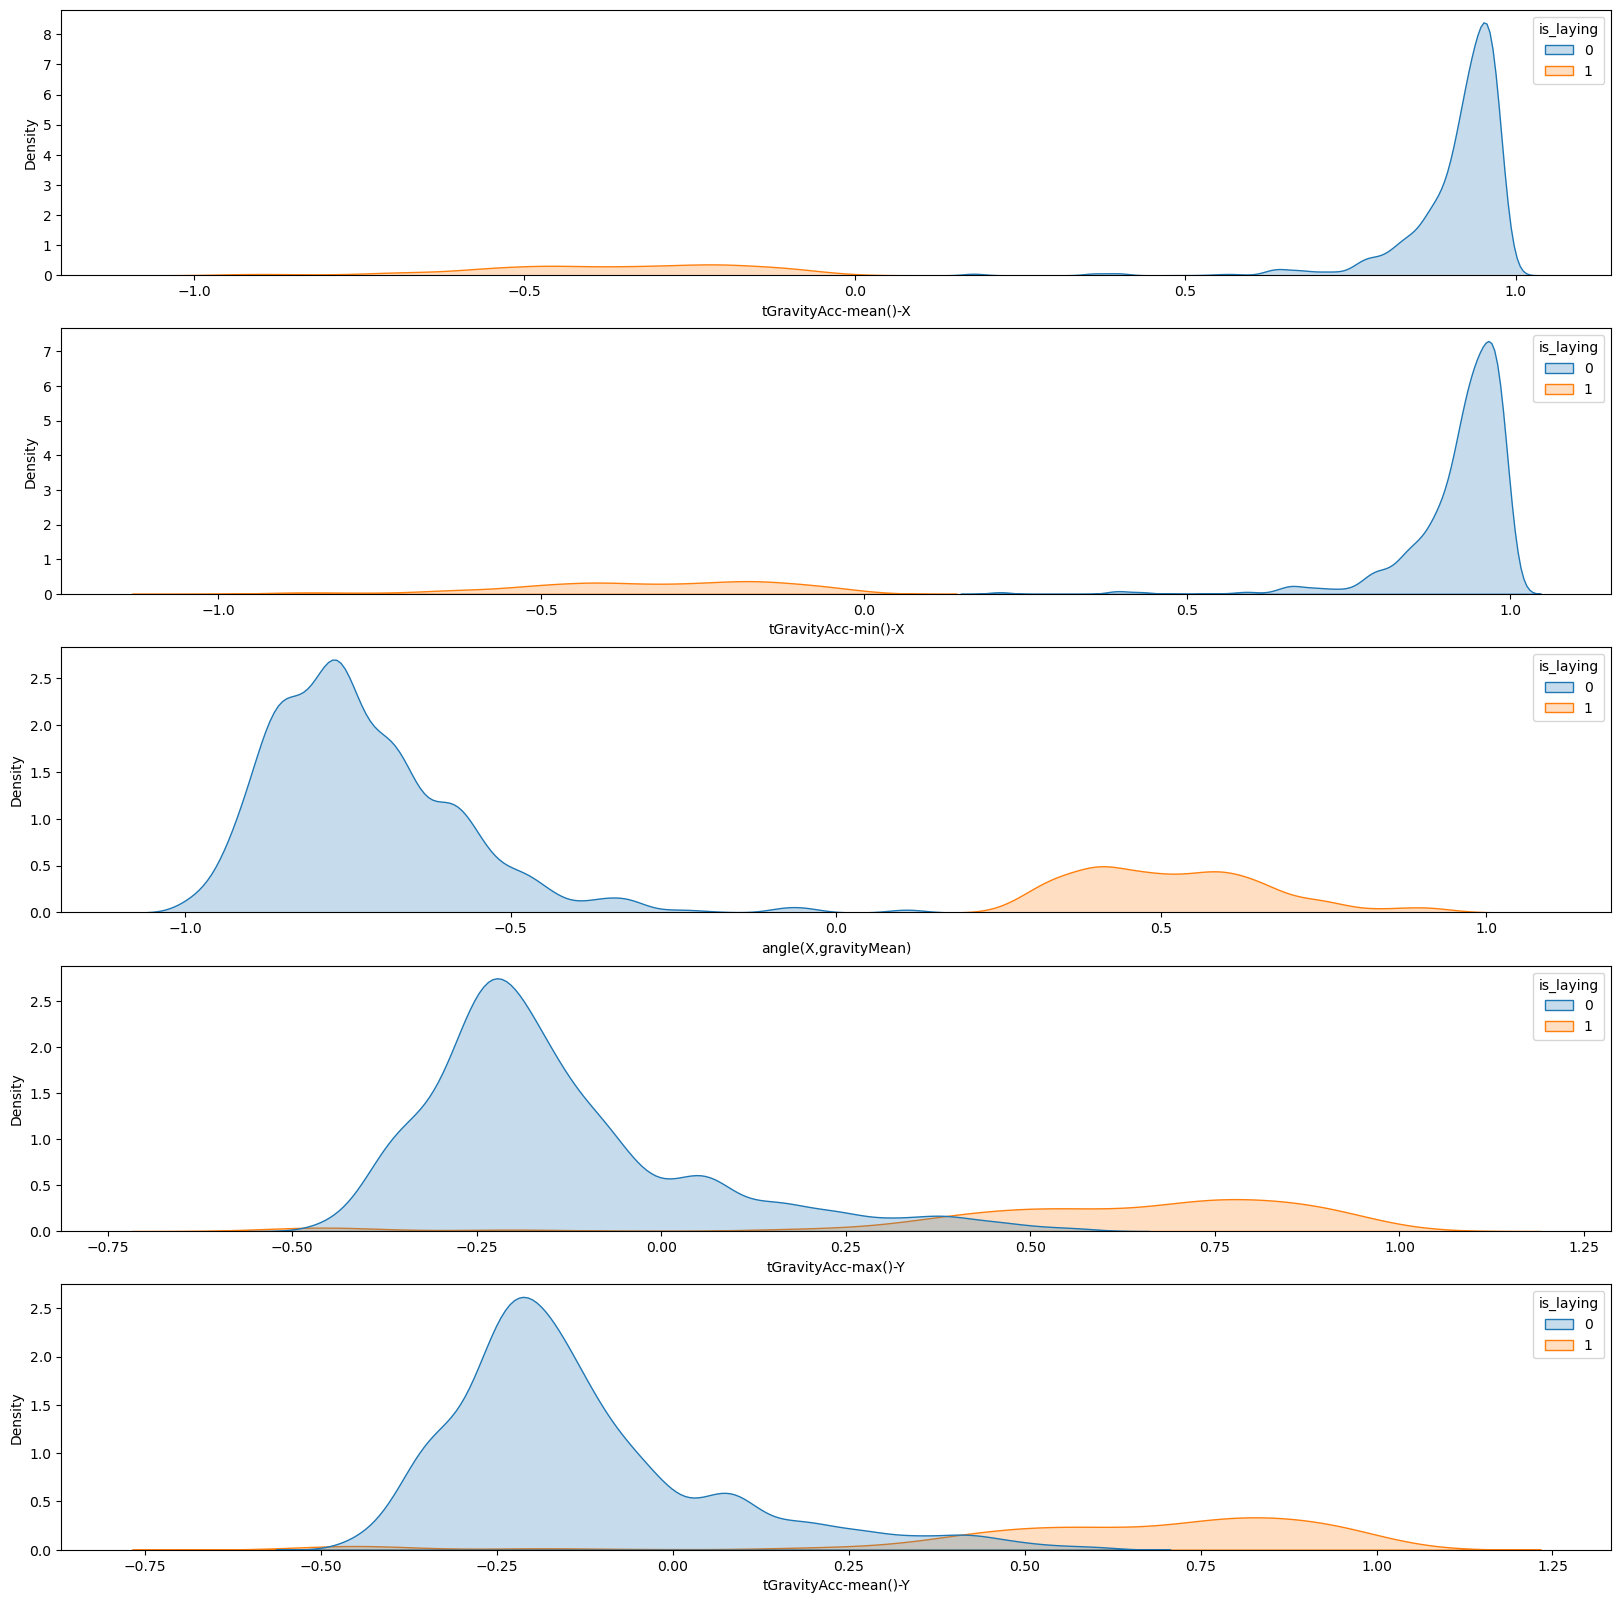

In [27]:
feature_names = model.feature_names_in_
feature_importances = model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)

# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])

##### walking

In [28]:
target = 'Activity'
new_target = 'WALKING'

data['is_walking'] = np.where(data[target]==new_target, 1, 0)

target = 'Activity'
new_target = 'is_walking'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

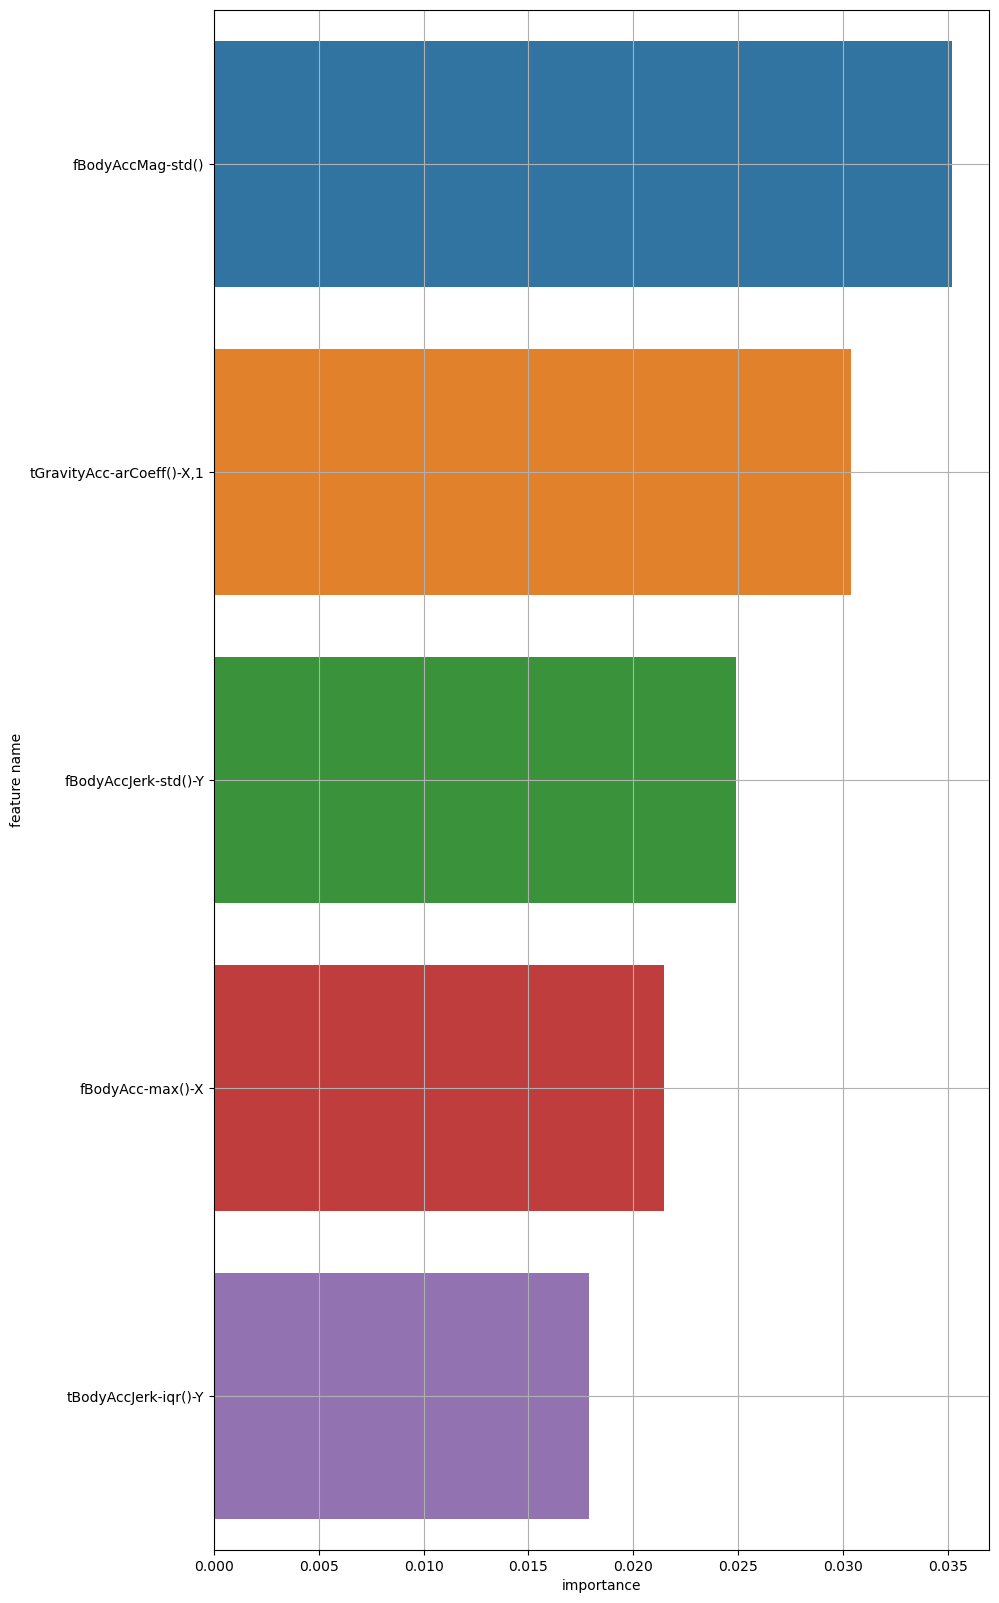

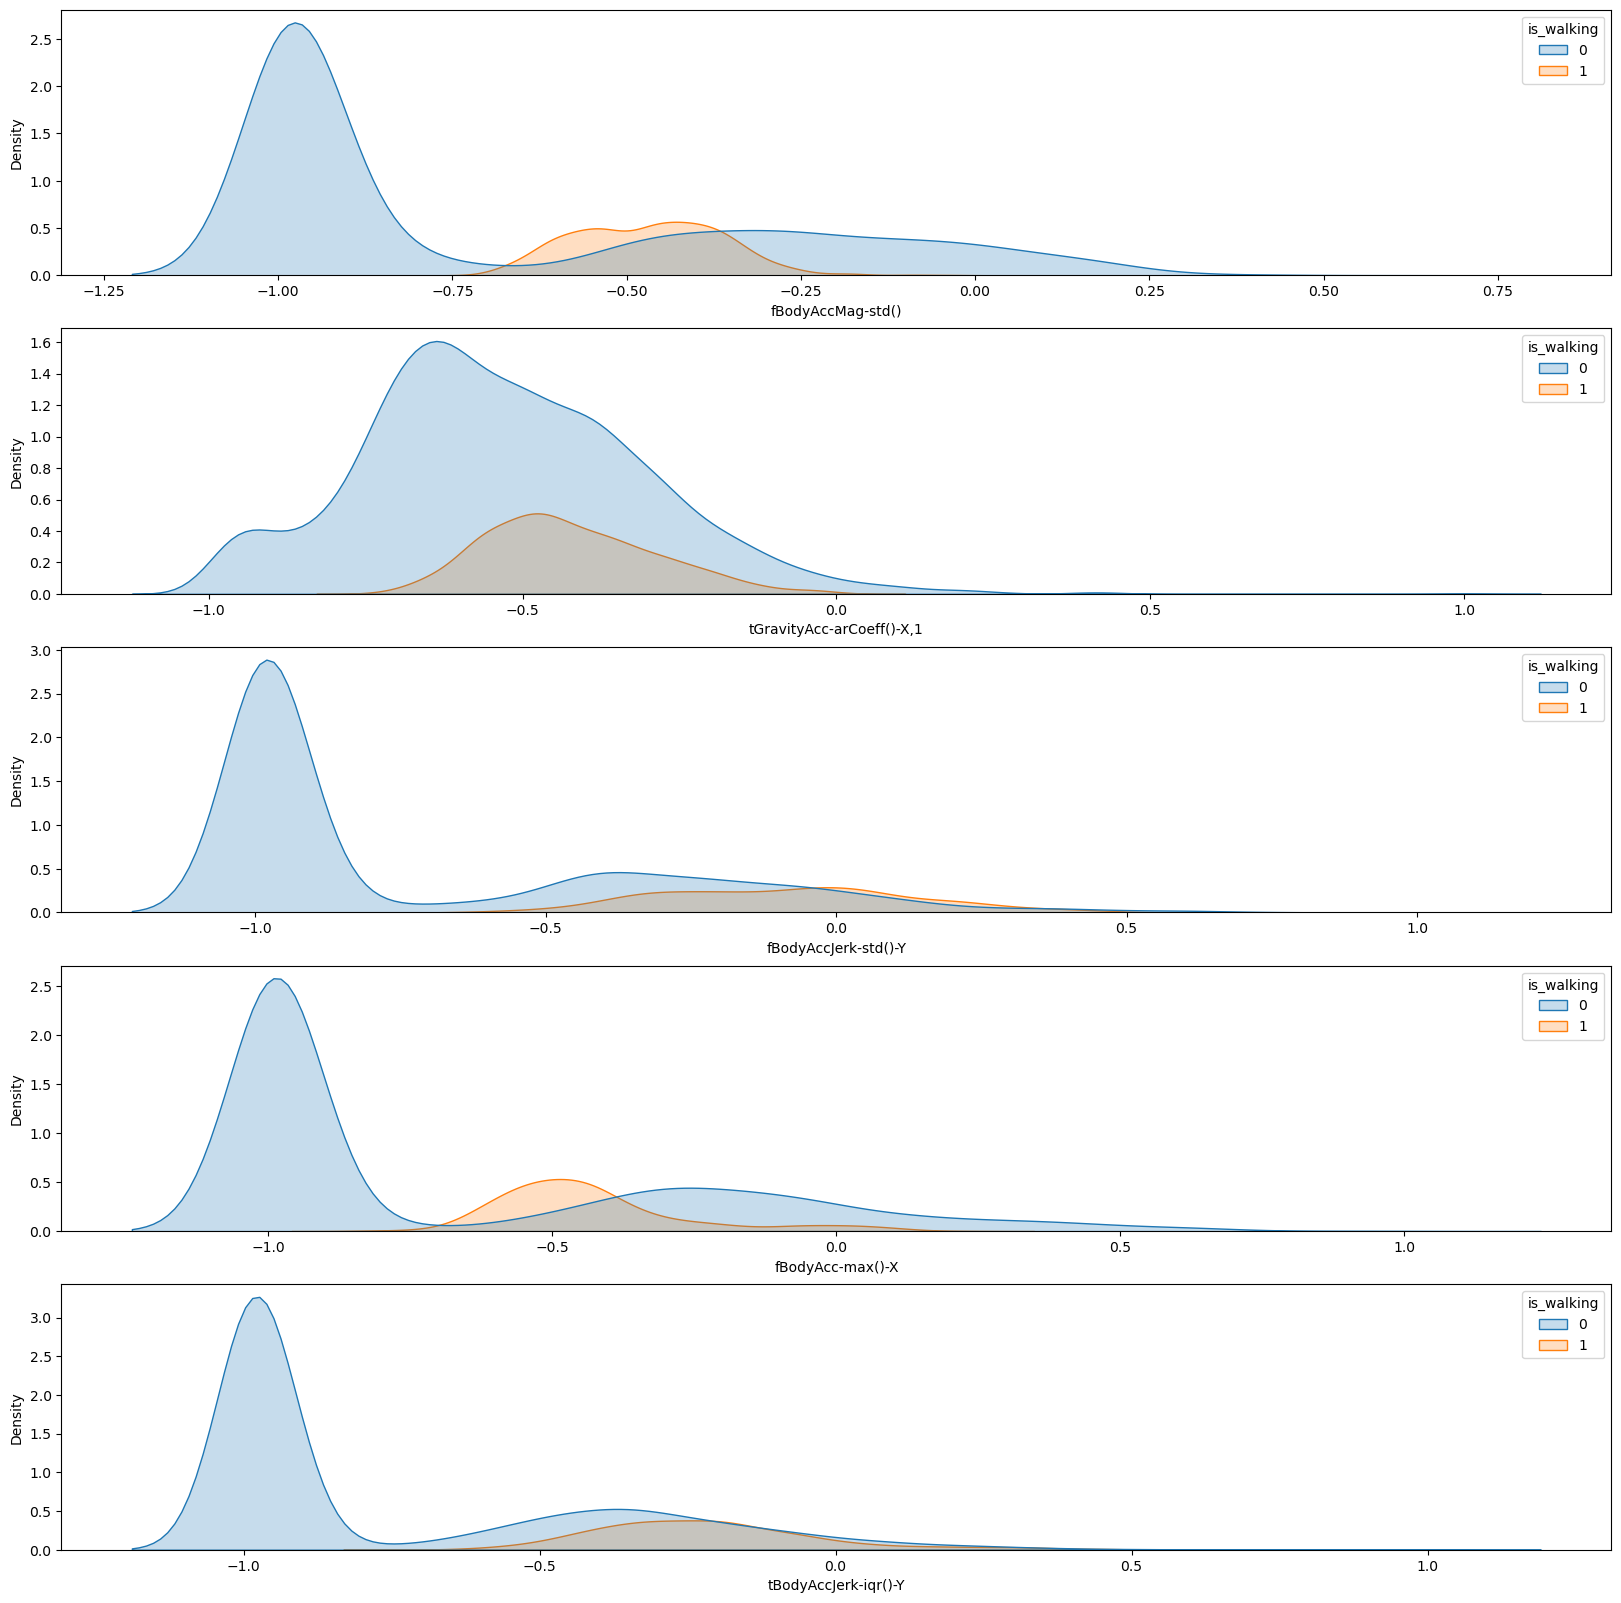

In [29]:
feature_names = model.feature_names_in_
feature_importances = model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)

# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])

##### walking_up

In [31]:
target = 'Activity'
new_target = 'WALKING_UPSTAIRS'

data['is_walking_up'] = np.where(data[target]==new_target, 1, 0)

target = 'Activity'
new_target = 'is_walking_up'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

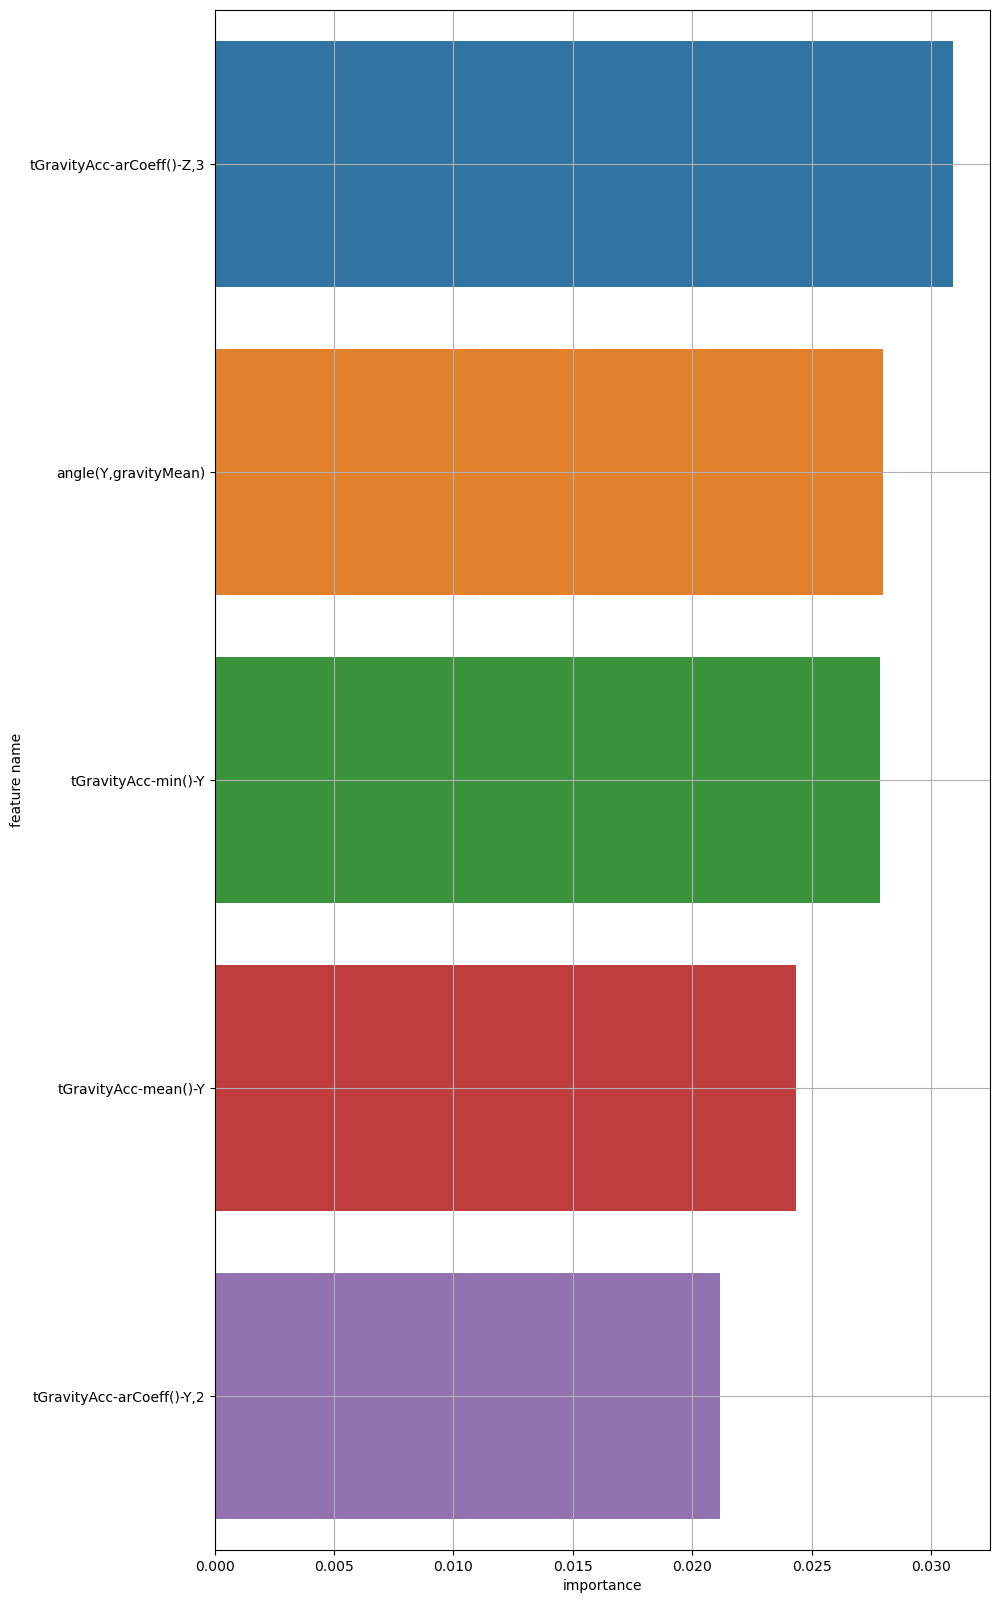

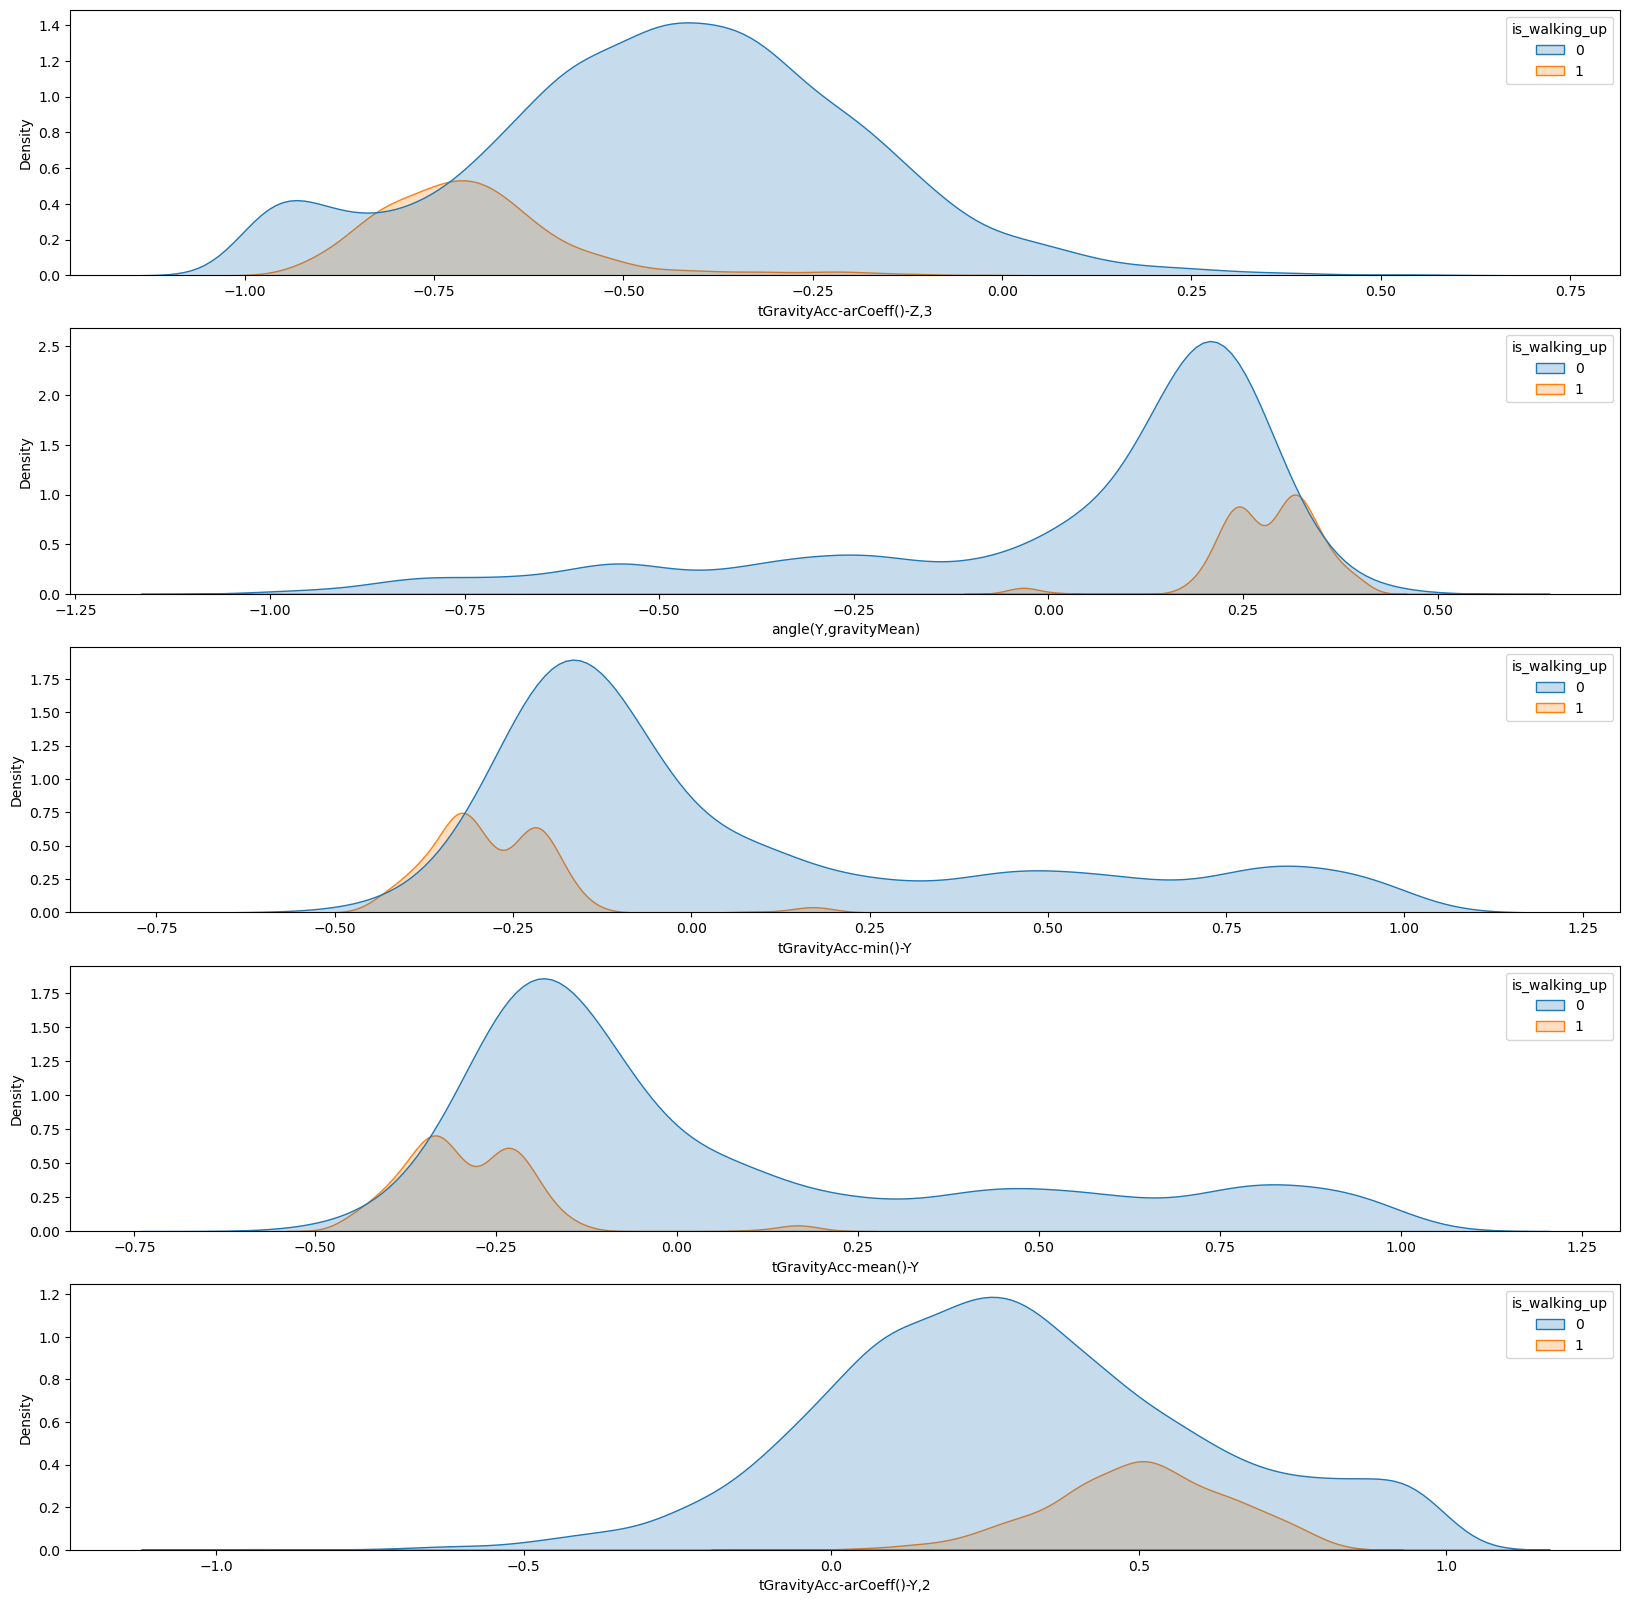

In [32]:
feature_names = model.feature_names_in_
feature_importances = model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)

# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])

##### walking_down

In [33]:
target = 'Activity'
new_target = 'WALKING_DOWNSTAIRS'

data['is_walking_down'] = np.where(data[target]==new_target, 1, 0)

target = 'Activity'
new_target = 'is_walking_down'

X = data.drop([target, new_target], axis=1)
y = data.loc[:,new_target]

x_train, x_valid, y_train, y_vaild = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

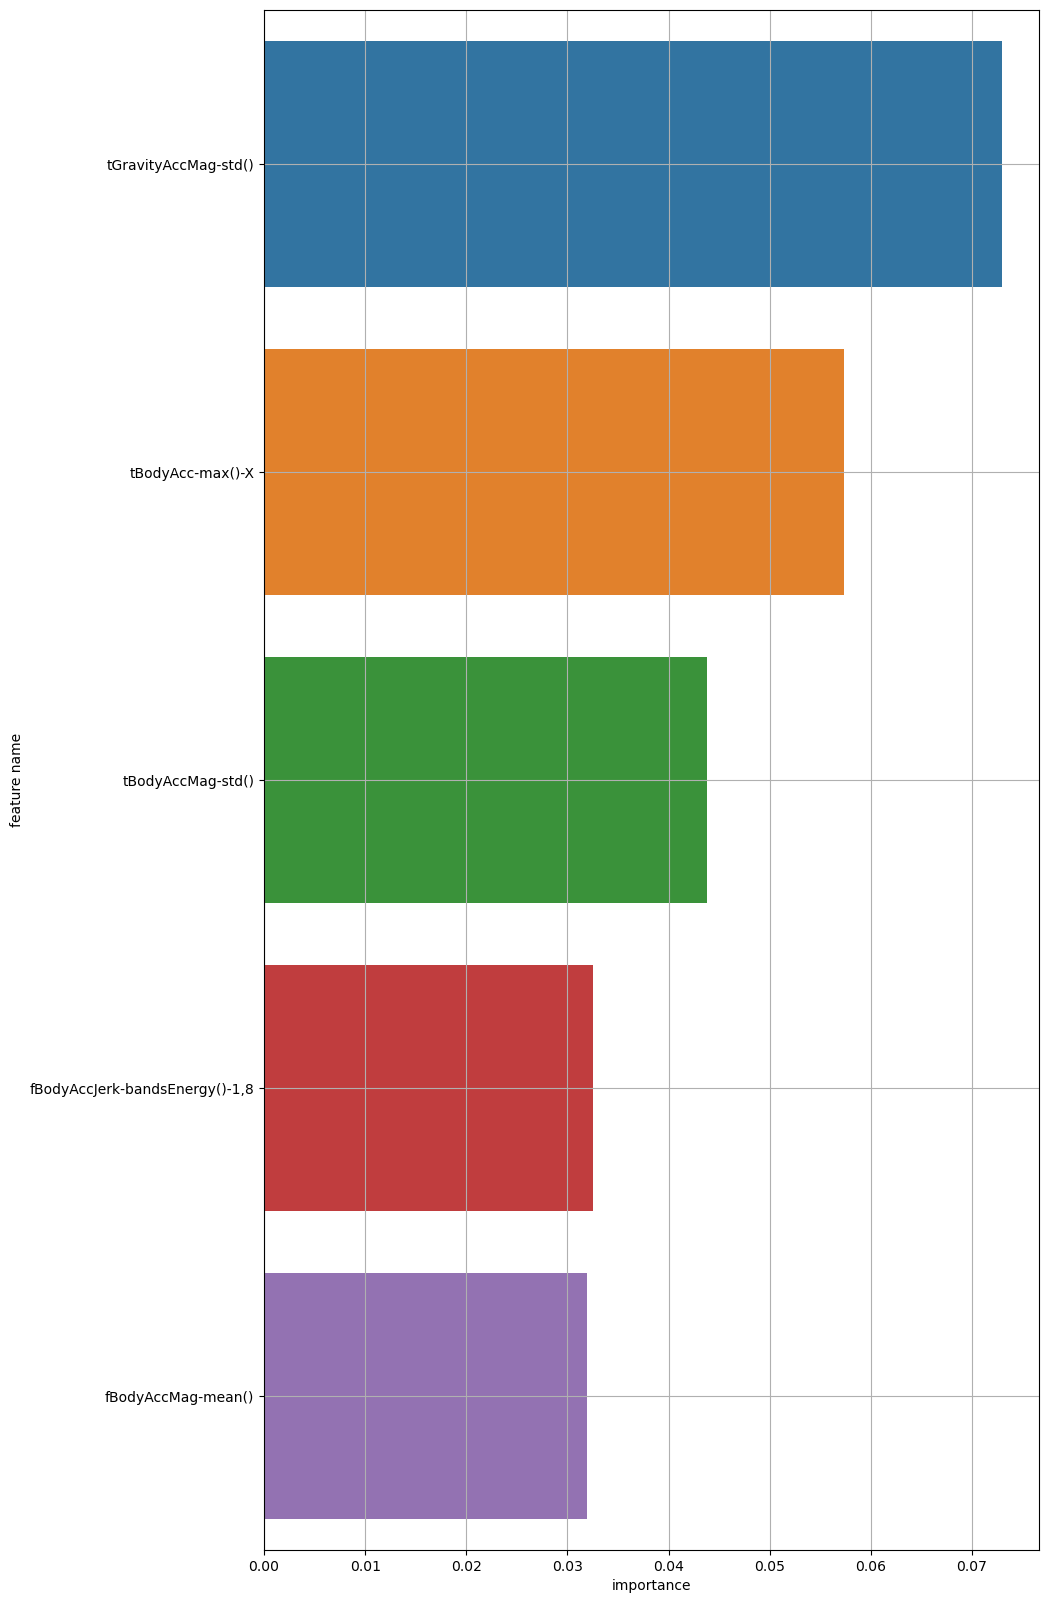

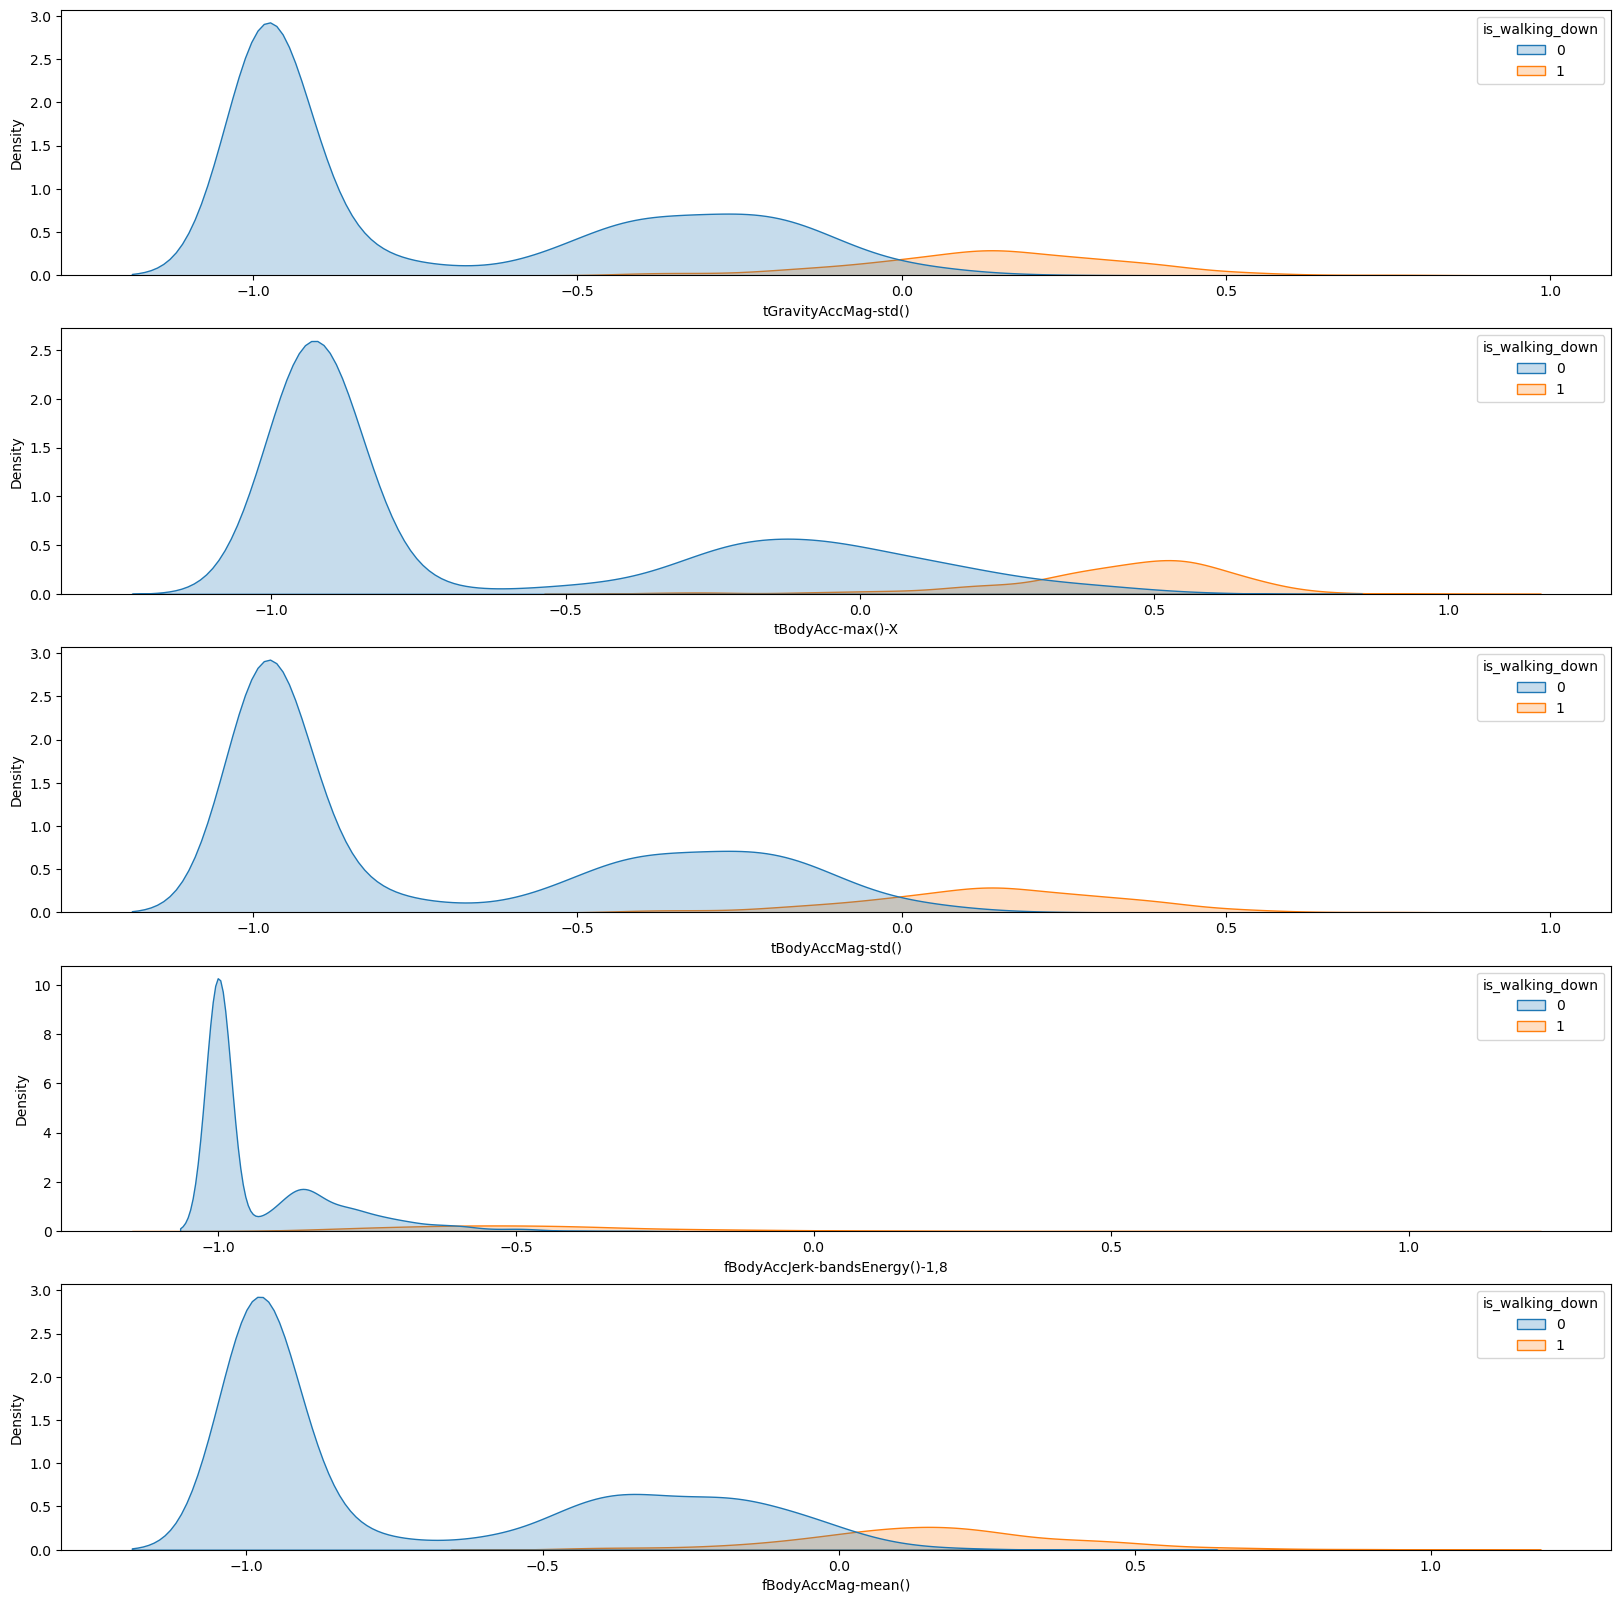

In [34]:
feature_names = model.feature_names_in_
feature_importances = model.feature_importances_

df = plot_feature_importance(feature_importances, feature_names, topn = 5)

# 상위 5개
fig, ax = plt.subplots(nrows=5,figsize=(20,20))
for i in range(5):
    sns.kdeplot(x=df['feature_name'].iloc[i], hue=new_target, data=data, fill=True, ax=ax[i])